## Conclusion 
- we have fond data features(e.g. prerfomance, school_meals, pupil_teacher_ratio) that we think will help predict the school ofsted reating
- performance data seems to be co-related, so will run a model on reduced features too

In [1]:
%run import_util.py
import scan_api
import util

START loading util functions
DONE loading util functions


In [2]:
# util declarations
n=2
start='2016'
end='2017'

util.data_directory="./data/"+start+"-"+end+"/"
root=util.read_file("cleanData1.csv")
root.head(n)

,URN,abscence,persitent_abscence,total_pupils,girls_perc,english_nfl,free_school_meal,is_london,total_income,total_expenditure,...,ptgps_exp,ptgps_high,gps_average,matprog,ptmat_exp,ptmat_high,ptmat_average,ofsted,pub_date,ofsted_phase
0,100000,2.5,2.8,276.0,49.3,59.3,12.0,True,8176.0,8319.0,...,92.0,50.0,109.0,3.1,92.0,38.0,107.0,1.0,2013-04-19,Primary
1,136807,3.8,6.5,92.0,44.6,59.7,13.0,False,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,2013-07-04,Primary


In [3]:
# standard EDA
df=root.copy()
display(df.shape)
display(df.head(n))
display(df.describe())
df.info()
df.isnull().sum()
df.columns

(16785, 37)

,URN,abscence,persitent_abscence,total_pupils,girls_perc,english_nfl,free_school_meal,is_london,total_income,total_expenditure,...,ptgps_exp,ptgps_high,gps_average,matprog,ptmat_exp,ptmat_high,ptmat_average,ofsted,pub_date,ofsted_phase
0,100000,2.5,2.8,276.0,49.3,59.3,12.0,True,8176.0,8319.0,...,92.0,50.0,109.0,3.1,92.0,38.0,107.0,1.0,2013-04-19,Primary
1,136807,3.8,6.5,92.0,44.6,59.7,13.0,False,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,2013-07-04,Primary


,URN,abscence,persitent_abscence,total_pupils,girls_perc,english_nfl,free_school_meal,total_income,total_expenditure,free_school_meal_band,...,read_average,writeprog,ptgps_exp,ptgps_high,gps_average,matprog,ptmat_exp,ptmat_high,ptmat_average,ofsted
count,16785.000000,16122.000000,15159.00000,16277.000000,16277.000000,16258.000000,16277.000000,12447.000000,12447.000000,12464.000000,...,13743.000000,13715.000000,13754.000000,13754.000000,13739.000000,13690.000000,13754.000000,13754.000000,13739.000000,16186.000000
mean,121689.151206,4.012474,8.38492,279.168520,49.054979,15.792988,13.108024,5049.810958,5045.459629,0.706595,...,104.353853,0.107393,78.190708,30.740294,105.930999,0.046603,75.961102,22.591173,104.180071,1.919560
std,13777.719474,0.993251,4.79523,161.043593,4.140244,21.724856,10.518818,1312.925099,1345.951584,0.569210,...,3.209742,2.466302,13.472084,15.382310,3.008076,2.688555,14.950769,13.721896,3.018921,0.563939
min,100000.000000,0.000000,0.00000,3.000000,0.000000,0.000000,0.000000,3198.000000,1097.000000,-1.000000,...,90.000000,-21.700000,0.000000,0.000000,93.000000,-13.500000,0.000000,0.000000,89.000000,1.000000
25%,110282.000000,3.300000,4.90000,174.000000,46.800000,1.800000,5.100000,4354.000000,4352.000000,1.000000,...,102.000000,-1.300000,71.000000,20.000000,104.000000,-1.700000,67.000000,13.000000,102.000000,2.000000
50%,119405.000000,3.900000,7.50000,239.000000,49.000000,6.100000,10.100000,4800.000000,4802.000000,1.000000,...,104.000000,0.200000,80.000000,29.000000,106.000000,0.100000,78.000000,21.000000,104.000000,2.000000
75%,136809.000000,4.500000,11.00000,386.000000,51.300000,20.100000,18.400000,5419.000000,5448.000000,1.000000,...,107.000000,1.600000,88.000000,40.000000,108.000000,1.800000,87.000000,31.000000,106.000000,2.000000
max,145068.000000,36.800000,89.70000,1543.000000,100.000000,100.000000,100.000000,70006.000000,82257.000000,1.000000,...,116.000000,10.800000,100.000000,100.000000,117.000000,11.000000,100.000000,93.000000,116.000000,4.000000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16785 entries, 0 to 16784
Data columns (total 37 columns):
URN                      16785 non-null int64
abscence                 16122 non-null float64
persitent_abscence       15159 non-null float64
total_pupils             16277 non-null float64
girls_perc               16277 non-null float64
english_nfl              16258 non-null float64
free_school_meal         16277 non-null float64
is_london                16785 non-null bool
total_income             12447 non-null float64
total_expenditure        12447 non-null float64
free_school_meal_band    12464 non-null float64
ntea                     16077 non-null float64
nteaas                   16077 non-null float64
nftetea                  16077 non-null float64
nfteteaas                16077 non-null float64
pupil_teacher_ratio      16049 non-null float64
la                       16122 non-null float64
estab                    16122 non-null float64
laestab                  16785 n

Index(['URN', 'abscence', 'persitent_abscence', 'total_pupils', 'girls_perc',
       'english_nfl', 'free_school_meal', 'is_london', 'total_income',
       'total_expenditure', 'free_school_meal_band', 'ntea', 'nteaas',
       'nftetea', 'nfteteaas', 'pupil_teacher_ratio', 'la', 'estab', 'laestab',
       'schname', 'postcode', 'isprimary', 'readprog', 'ptread_exp',
       'ptread_high', 'read_average', 'writeprog', 'ptgps_exp', 'ptgps_high',
       'gps_average', 'matprog', 'ptmat_exp', 'ptmat_high', 'ptmat_average',
       'ofsted', 'pub_date', 'ofsted_phase'],
      dtype='object')

In [4]:
# convert boolean to 0/1
df['is_london'].replace(True, 1,inplace=True)
df['is_london'].replace(False, 0,inplace=True)
display(df.head(n))

,URN,abscence,persitent_abscence,total_pupils,girls_perc,english_nfl,free_school_meal,is_london,total_income,total_expenditure,...,ptgps_exp,ptgps_high,gps_average,matprog,ptmat_exp,ptmat_high,ptmat_average,ofsted,pub_date,ofsted_phase
0,100000,2.5,2.8,276.0,49.3,59.3,12.0,1.0,8176.0,8319.0,...,92.0,50.0,109.0,3.1,92.0,38.0,107.0,1.0,2013-04-19,Primary
1,136807,3.8,6.5,92.0,44.6,59.7,13.0,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,2013-07-04,Primary


In [5]:
# filter data for schools inspected this year
df['pub_date'] = df.pub_date.apply(util.convert_to_datetime1) 
df.dropna(axis=0, how='any', subset=['pub_date'],inplace=True)
start_date = datetime.strptime(start+'-08-01', '%Y-%m-%d')
end_date = datetime.strptime(end+'-07-30', '%Y-%m-%d')
df = df[ (df['pub_date']>start_date) & (df['pub_date']<end_date) ]
display(df['ofsted'].value_counts())

2.0    943
3.0    736
4.0    166
1.0    161
Name: ofsted, dtype: int64

In [6]:
# pick only numeric
df=df.select_dtypes(['number'])
display(df.shape)
display(df.info())

(2006, 33)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2006 entries, 38 to 16784
Data columns (total 33 columns):
URN                      2006 non-null int64
abscence                 1991 non-null float64
persitent_abscence       1925 non-null float64
total_pupils             1994 non-null float64
girls_perc               1994 non-null float64
english_nfl              1994 non-null float64
free_school_meal         1994 non-null float64
is_london                2006 non-null float64
total_income             1383 non-null float64
total_expenditure        1383 non-null float64
free_school_meal_band    1383 non-null float64
ntea                     1980 non-null float64
nteaas                   1980 non-null float64
nftetea                  1980 non-null float64
nfteteaas                1980 non-null float64
pupil_teacher_ratio      1976 non-null float64
la                       1991 non-null float64
estab                    1991 non-null float64
laestab                  2006 non-null float64


None

In [7]:
display(df.shape)
display(df['ofsted'].value_counts())

# based on above, 600+ schools are missing total_income, total_expenditure,free_school_meal_band
# So, we should drop them from the feature set
df.drop(columns=['total_income', 'total_expenditure','free_school_meal_band'],inplace=True)

# after analysing the rest, the NaN means data is missing, so wee need to drop those rows
df.dropna(axis=0, how='any',inplace=True)
display(df.shape)
display(df['ofsted'].value_counts())

display(df.isnull().sum())
df.head(n)

(2006, 33)

2.0    943
3.0    736
4.0    166
1.0    161
Name: ofsted, dtype: int64

(1688, 30)

2.0    781
3.0    622
4.0    149
1.0    136
Name: ofsted, dtype: int64

URN                    0
abscence               0
persitent_abscence     0
total_pupils           0
girls_perc             0
english_nfl            0
free_school_meal       0
is_london              0
ntea                   0
nteaas                 0
nftetea                0
nfteteaas              0
pupil_teacher_ratio    0
la                     0
estab                  0
laestab                0
isprimary              0
readprog               0
ptread_exp             0
ptread_high            0
read_average           0
writeprog              0
ptgps_exp              0
ptgps_high             0
gps_average            0
matprog                0
ptmat_exp              0
ptmat_high             0
ptmat_average          0
ofsted                 0
dtype: int64

,URN,abscence,persitent_abscence,total_pupils,girls_perc,english_nfl,free_school_meal,is_london,ntea,nteaas,...,read_average,writeprog,ptgps_exp,ptgps_high,gps_average,matprog,ptmat_exp,ptmat_high,ptmat_average,ofsted
38,100044,5.3,18.2,176.0,57.4,71.3,44.3,1.0,8.0,10.0,...,104.0,1.8,96.0,62.0,110.0,4.8,96.0,27.0,107.0,2.0
83,100168,2.5,2.1,249.0,51.8,35.8,16.1,1.0,16.0,14.0,...,111.0,1.5,97.0,63.0,111.0,2.9,91.0,38.0,108.0,1.0


In [8]:
# categorise various features and analyse correlation
features1=['ofsted','abscence', 'persitent_abscence',
          'total_pupils', 'girls_perc',
          'english_nfl', 'free_school_meal']
features2=['ofsted','is_london', 
          'ntea', 'nteaas','nftetea', 'nfteteaas', 
          'pupil_teacher_ratio']
features3=['ofsted','readprog', 'ptread_exp','ptread_high', 'read_average']
features4=['ofsted','writeprog', 'ptgps_exp', 'ptgps_high','gps_average']
features5=['ofsted','matprog', 'ptmat_exp', 'ptmat_high', 'ptmat_average']

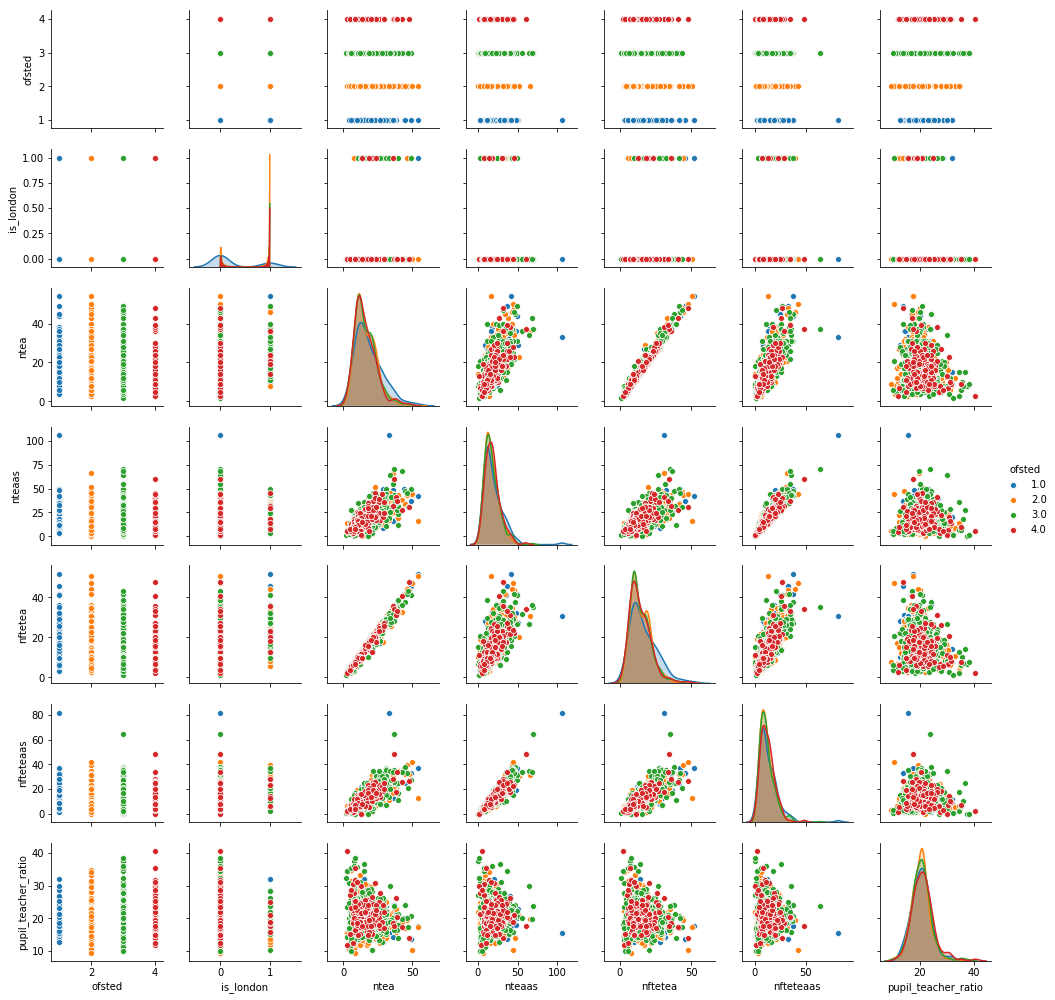

In [9]:
sns.pairplot(df[features2], hue="ofsted", height=2);

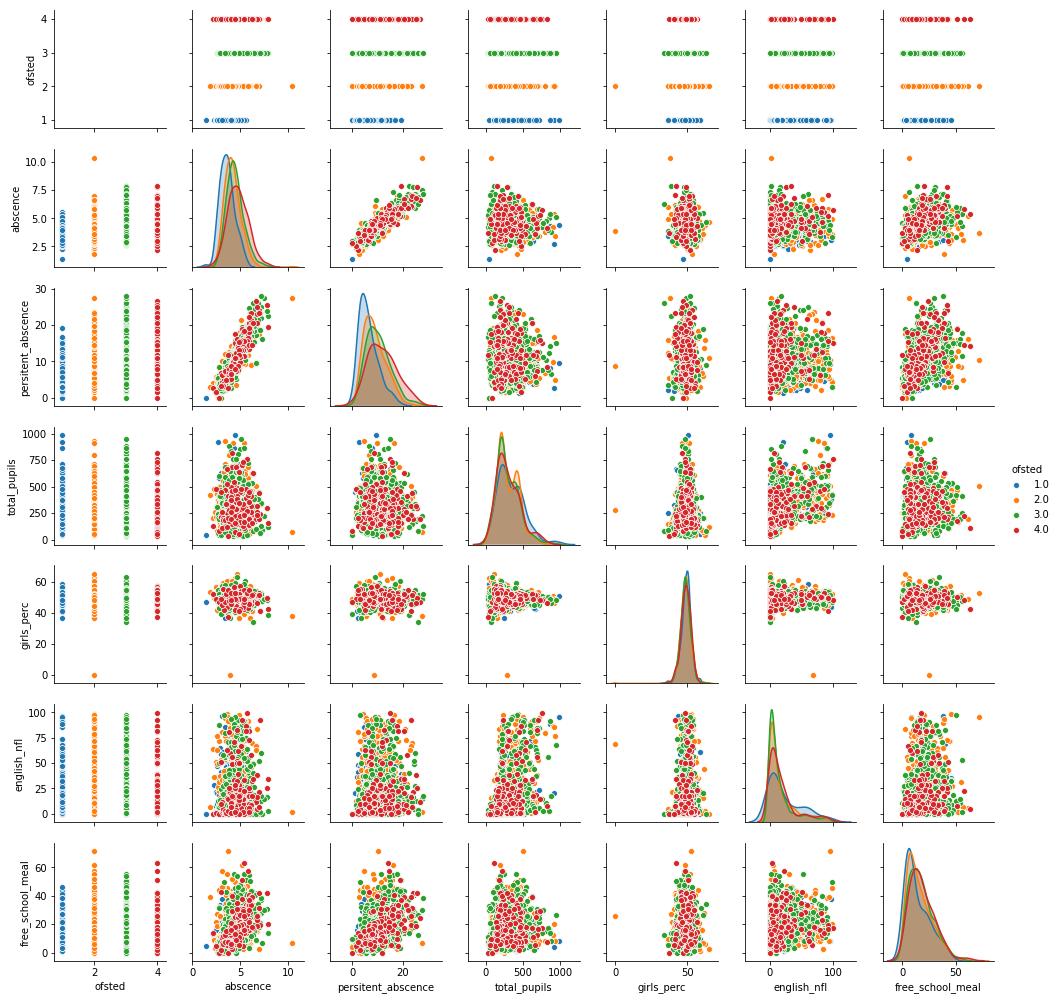

In [10]:
sns.pairplot(df[features1], hue="ofsted", height=2);

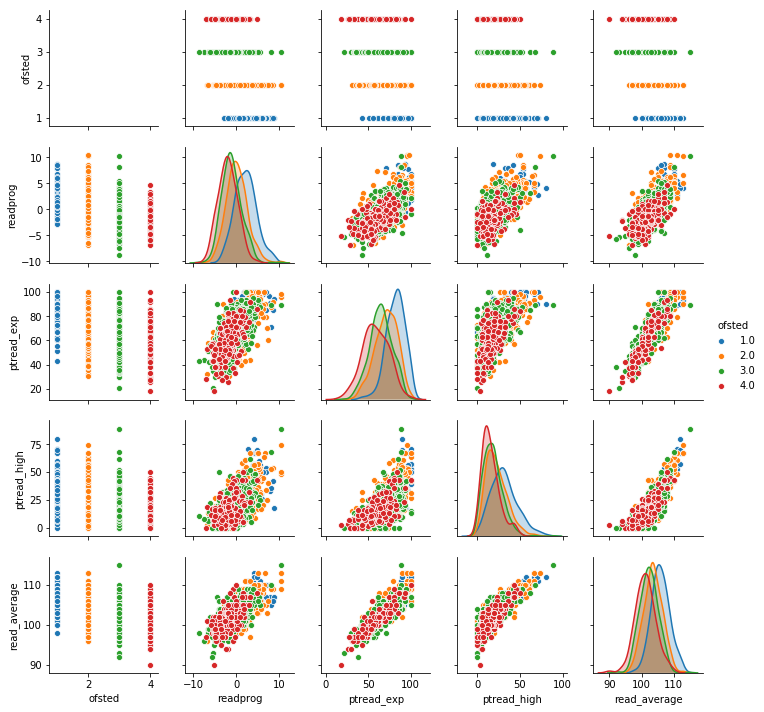

In [11]:
sns.pairplot(df[features3], hue="ofsted", height=2);

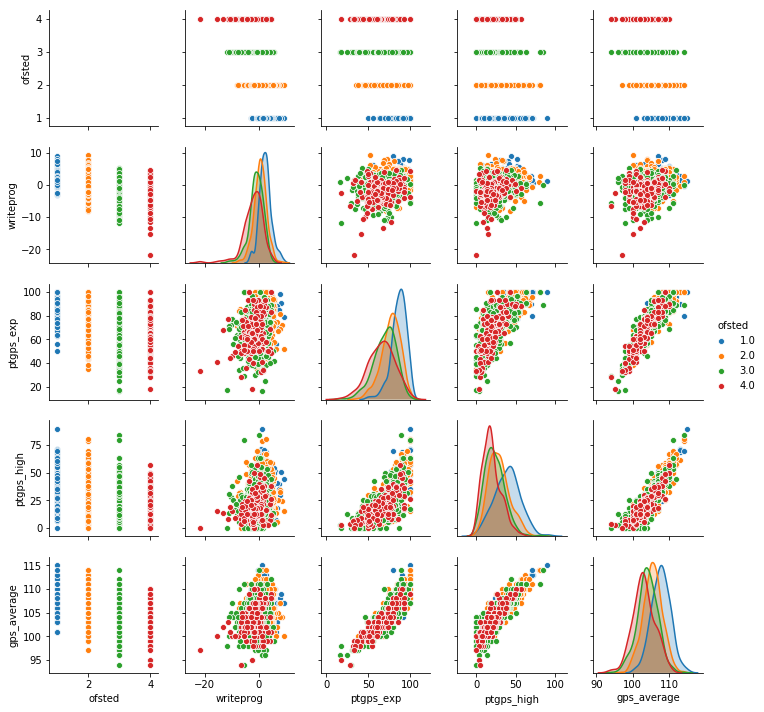

In [12]:
sns.pairplot(df[features4], hue="ofsted", height=2);

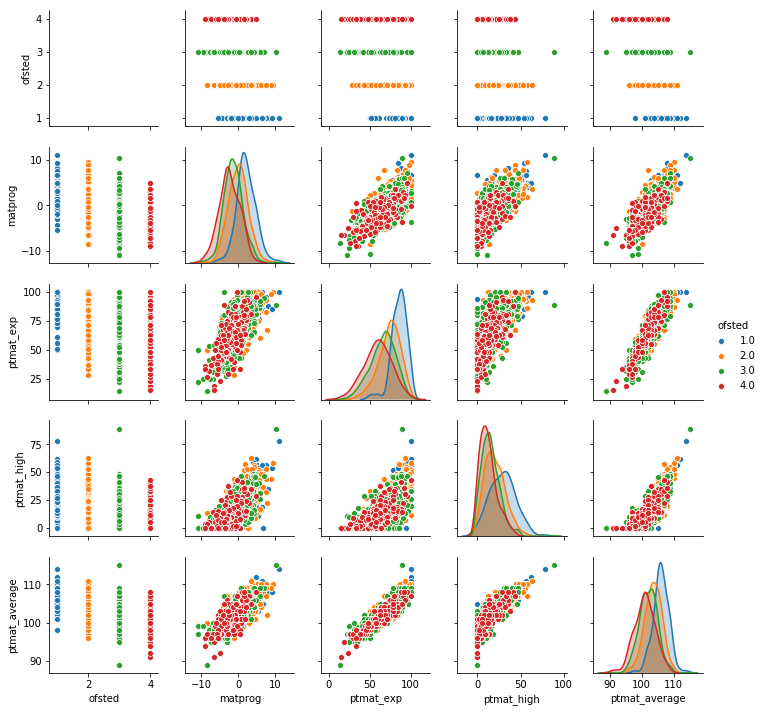

In [13]:
sns.pairplot(df[features5], hue="ofsted", height=2);